# Is apartment-type property cheaper than house-type on Airbnb?


## Introduction


## Preliminary Results

In [135]:
library(tidyverse)
library(tidymodels)
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)
library(broom)
library(digest)

In [136]:
# read data
data <- read.csv("data/train.csv") |>
select(log_price, property_type)
head(data)

,log_price,property_type
,<dbl>,<chr>
1,5.010635,Apartment
2,5.129899,Apartment
3,4.976734,Apartment
4,6.620073,House
5,4.744932,Apartment
6,4.442651,Apartment


In [138]:
#Clean and wrangle the dataset into a tidy format
set.seed(320)
#choose needed column
Airbnb_tidy <- Airbnb |> select(log_price, property_type) |> filter(property_type %in% c("House", "Apartment")) 

nrow(Airbnb_tidy)
head(Airbnb_tidy)

[1] 65514

log_price,property_type
<dbl>,<chr>
5.010635,Apartment
5.129899,Apartment
4.976734,Apartment
6.620073,House
4.744932,Apartment
4.442651,Apartment


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



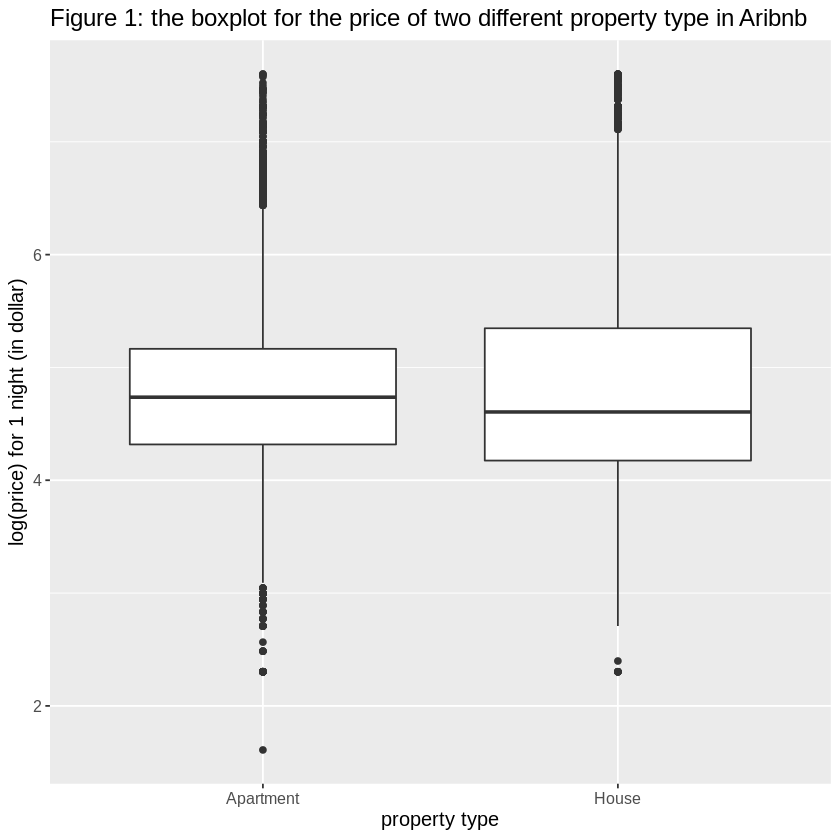

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



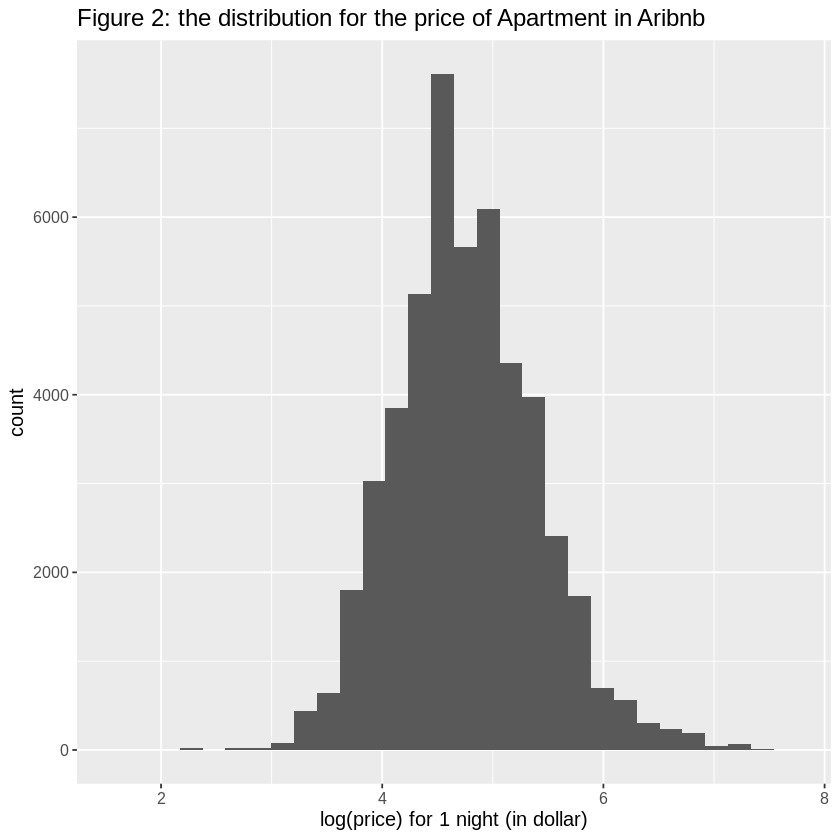

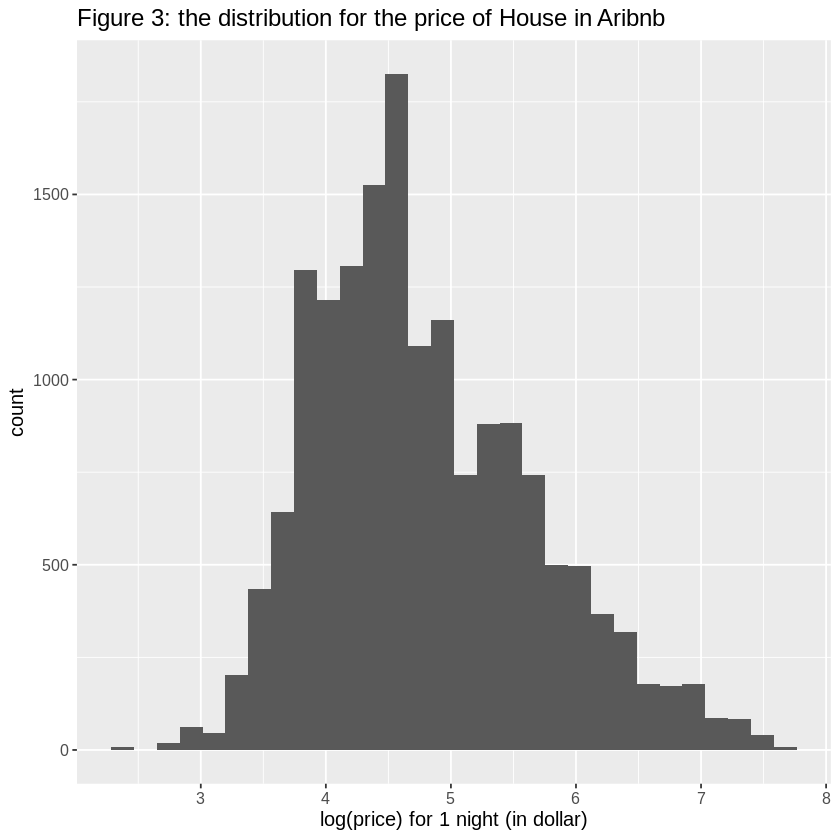

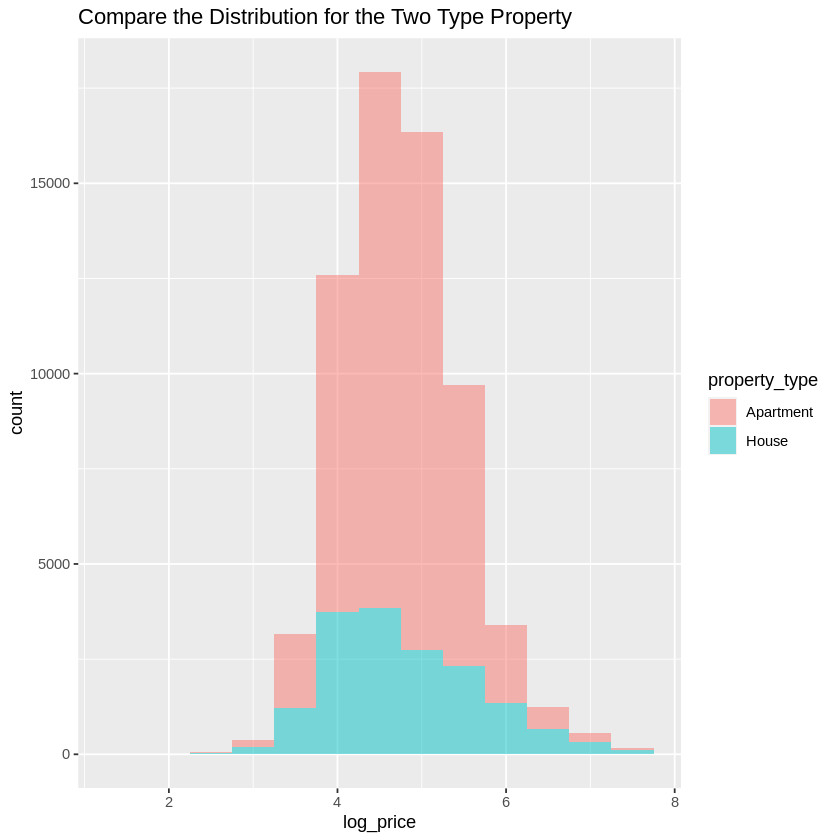

In [140]:
#Plot the relevant raw data
set.seed(320)


#boxplot

log_price_boxplot <- ggplot(Airbnb_tidy,aes(x=property_type,y=log_price))+
                     geom_boxplot()+
                     labs(x="property type",y="log(price) for 1 night (in dollar)") +
                     theme(text=element_text(size=12))+
                     labs(title="Figure 1: the boxplot for the price of two different property type in Aribnb")
log_price_boxplot

Apartment_data <- Airbnb_tidy |> filter(property_type=="Apartment")

Apartment_distribution <- ggplot(Apartment_data,aes(x=log_price))+
                          geom_histogram()+
                          labs(x="log(price) for 1 night (in dollar)") +
                          theme(text=element_text(size=12))+
                          labs(title="Figure 2: the distribution for the price of Apartment in Aribnb")
Apartment_distribution
 House_data <- Airbnb_tidy |> filter(property_type=="House")

House_distribution <- ggplot(House_data,aes(x=log_price))+
                          geom_histogram()+
                          labs(x="log(price) for 1 night (in dollar)") +
                          theme(text=element_text(size=12))+
                          labs(title="Figure 3: the distribution for the price of House in Aribnb")
House_distribution

compare_distribution <- Airbnb_tidy |>
                        ggplot(aes(x=log_price,fill=property_type))+
                        geom_histogram(binwidth=0.5,alpha=0.5)+
                        ggtitle("Compare the Distribution for the Two Type Property")
compare_distribution

In [142]:
#estimate the parameter
set.seed(320)
prop_house_apartment <- Airbnb_tidy |>
group_by(property_type) |>
summarize(percent =  n()/nrow(Airbnb_tidy )) |>
arrange(desc(percent))
print("Table 1: the proportion of the property type") 
prop_house_apartment


Airbnb_summary <- Airbnb_tidy %>%  summary()
print("Table 2: summary") 
Airbnb_summary


estimates<- Airbnb_tidy %>%
            group_by(property_type) %>%
            summarize(mean = mean(log_price),sd = sd(log_price))
print("Table 3: mean and sd value for aribnb dataset") 
estimates

[1] "Table 1: the proportion of the property type"


property_type,percent
<chr>,<dbl>
Apartment,0.7479775
House,0.2520225


[1] "Table 2: summary"


   log_price     property_type     
 Min.   :1.609   Length:65514      
 1st Qu.:4.277   Class :character  
 Median :4.700   Mode  :character  
 Mean   :4.768                     
 3rd Qu.:5.193                     
 Max.   :7.600                     

[1] "Table 3: mean and sd value for aribnb dataset"


property_type,mean,sd
<chr>,<dbl>,<dbl>
Apartment,4.758850,0.6408249
House,4.797114,0.8758650


Define notations as follows:

- $\mu_h =$  population mean log price of house type listings
- $\mu_a =$ population mean log price of apartment type listings
- $x_h =$  sample mean log price of house type listings
- $x_a =$ sample mean log price of apartment type listings
- $\delta = \mu_h - \mu_a$
- $d = x_h - x_a$
- Null hypothesis $H_0: \delta = 0$
- Alternative hypothesis $H_a: \delta >0$


We observe $x_h > x_a \text{ which implies  } d > 0$.

## Methods: Plan

## References